In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

data = pd.read_csv('/home/pratiyushp/Downloads/datasets/advertising.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
#Exploratory Data Analysis

Text(0.5, 0, 'Age')

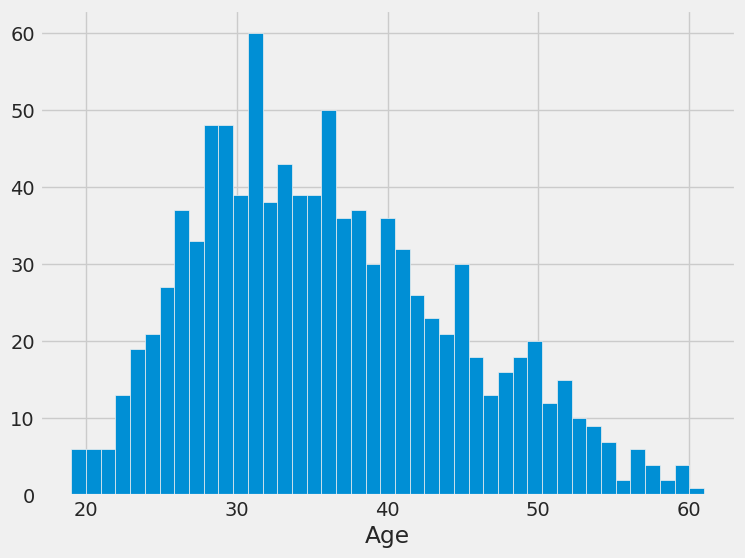

In [7]:
plt.figure(figsize=(8,6))
data.Age.hist(bins=data.Age.nunique())
# The argument bins=data.Age.nunique() specifies the number of bins 
# for the histogram, which is set equal to the number of unique ages 
# in the 'Age' column of the dataset. This essentially means that each 
# unique age value will have its own bin.
plt.xlabel('Age')

<Figure size 800x600 with 0 Axes>

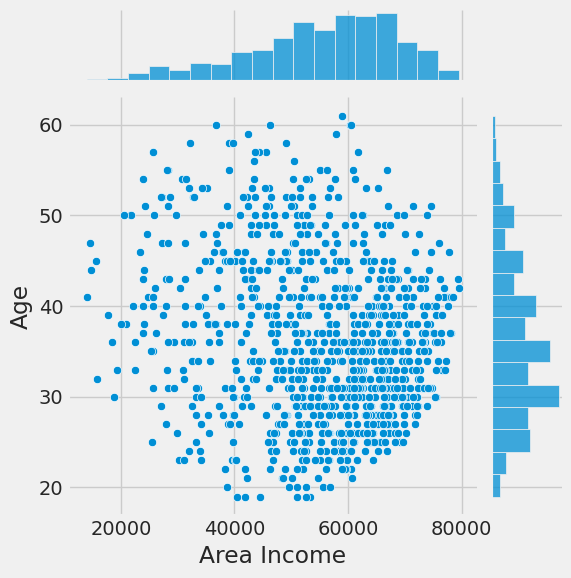

In [8]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data['Area Income'], y = data.Age)

<Figure size 800x600 with 0 Axes>

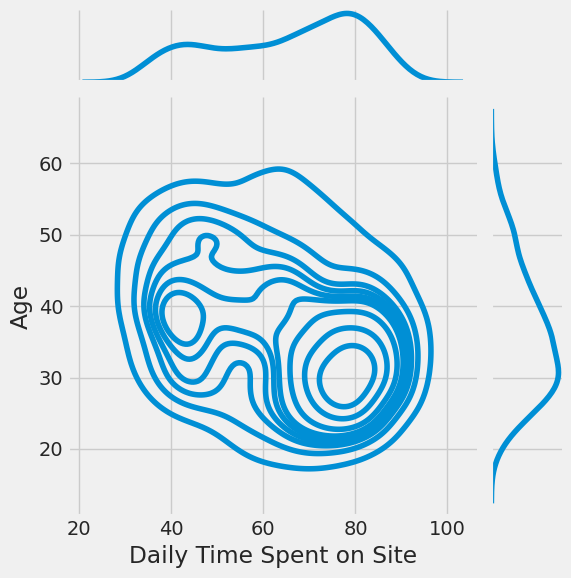

In [10]:
plt.figure(figsize = (8, 6))
sns.jointplot(x=data['Daily Time Spent on Site'], y = data.Age, kind ='kde')

<Figure size 800x600 with 0 Axes>

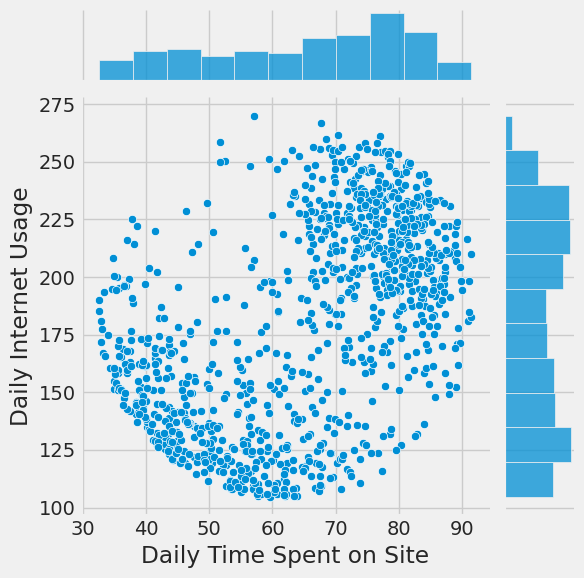

In [12]:
plt.figure(figsize=(8, 6))
sns.jointplot(x= data['Daily Time Spent on Site'], y = data['Daily Internet Usage'])

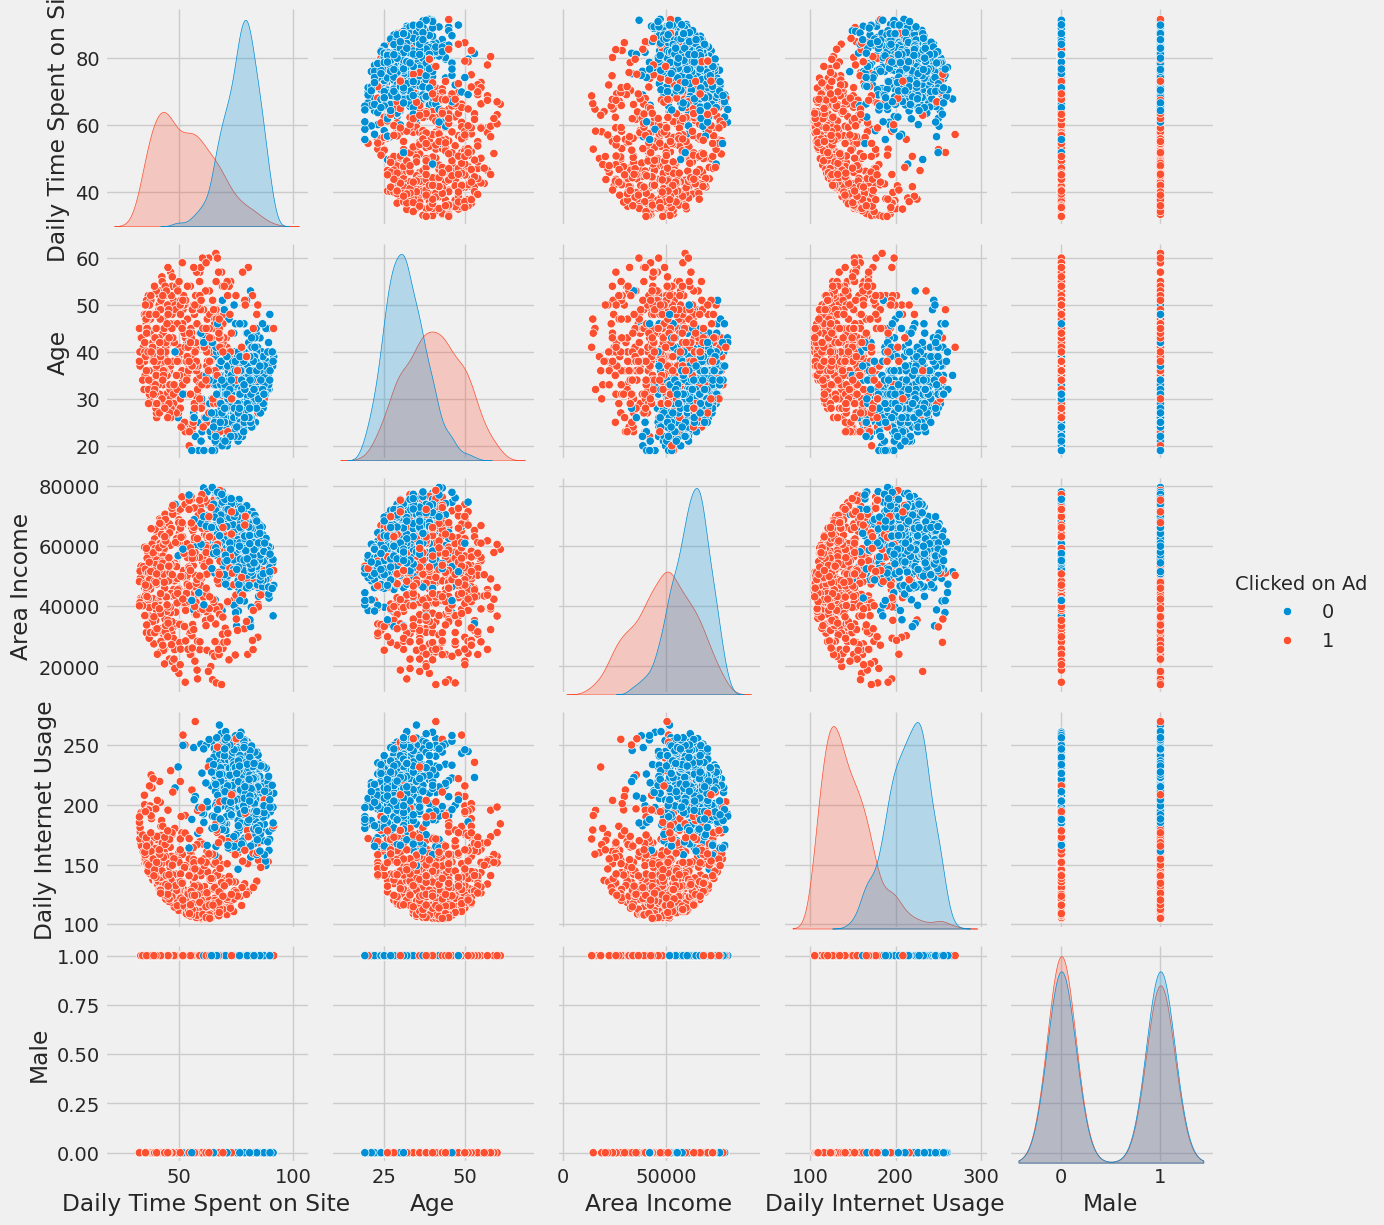

In [13]:
sns.pairplot(data, hue = 'Clicked on Ad')

In [14]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

<Axes: >

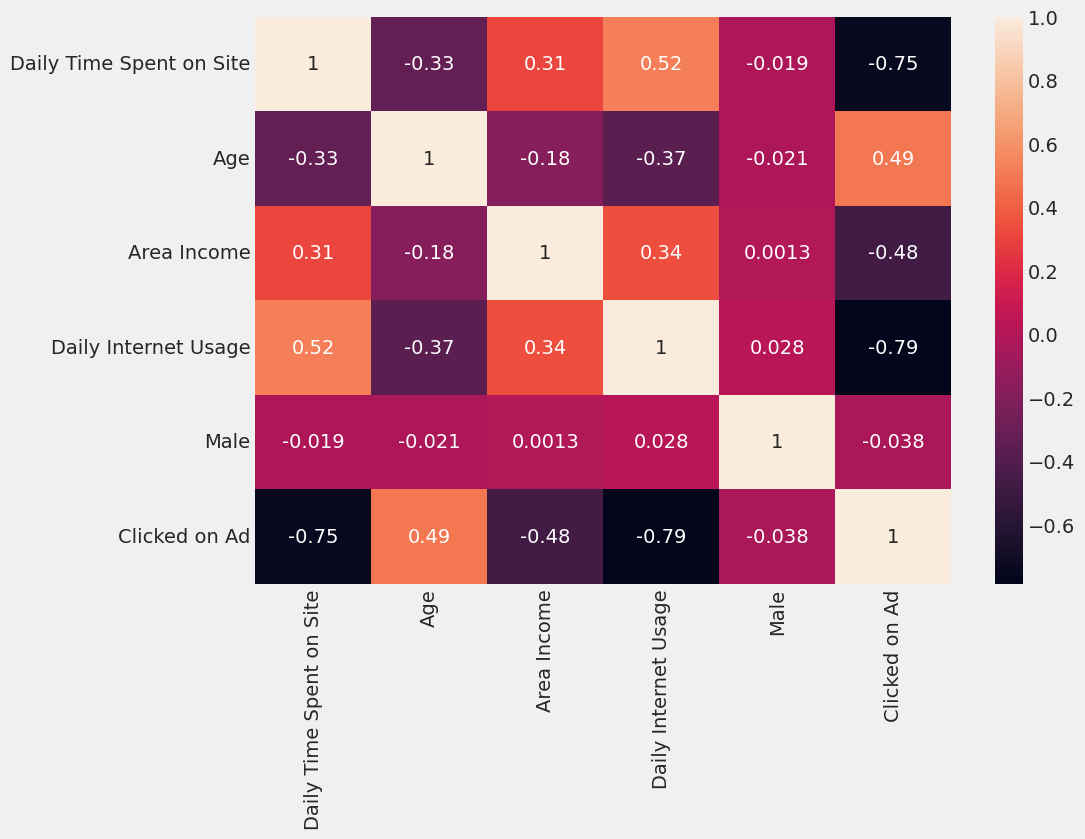

In [39]:
numeric_data = data.select_dtypes(include = ['number'])
# This step is important as the data contains of numeric a s well as non numeric
# data. So to plot this graph we will need to fetch only the numeric data and then apply the methods on it
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True)

Text(0.5, 1.0, 'Sigmoid Function')

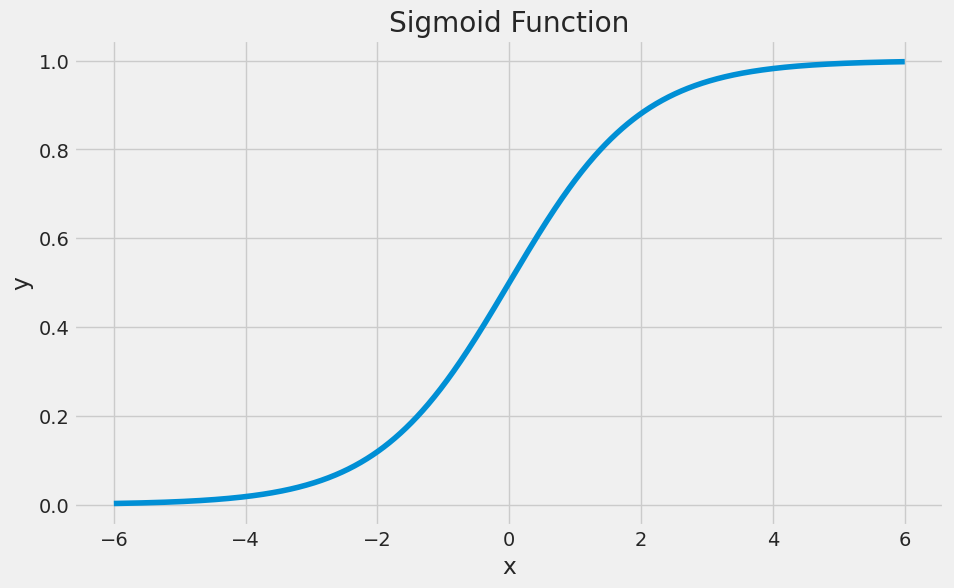

In [40]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (10, 6))
plt.plot(x, (1/(1+np.exp(-x))))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function')

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred=clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict= True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis = 1)
y =  data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

ct = make_column_transformer((MinMaxScaler(), num_columns), (StandardScaler(), num_columns), remainder = 'passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 13 333]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    354.0  346.0       1.0      700.0         700.0
_______________________________________________
Confusion Matrix: 
 [[354   0]
 [  0 346]]

Test Result:
Accuracy Score: 96.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946667    0.973333      0.96    0.960000      0.960356
recall       0.972603    0.948052      0.96    0.960327      0.960000
f1-score     0.959459    0.960526      0.96    0.959993      0.960007
support    146.000000  154.000000      0.96  300.000000    300.000000
_______________________________________________

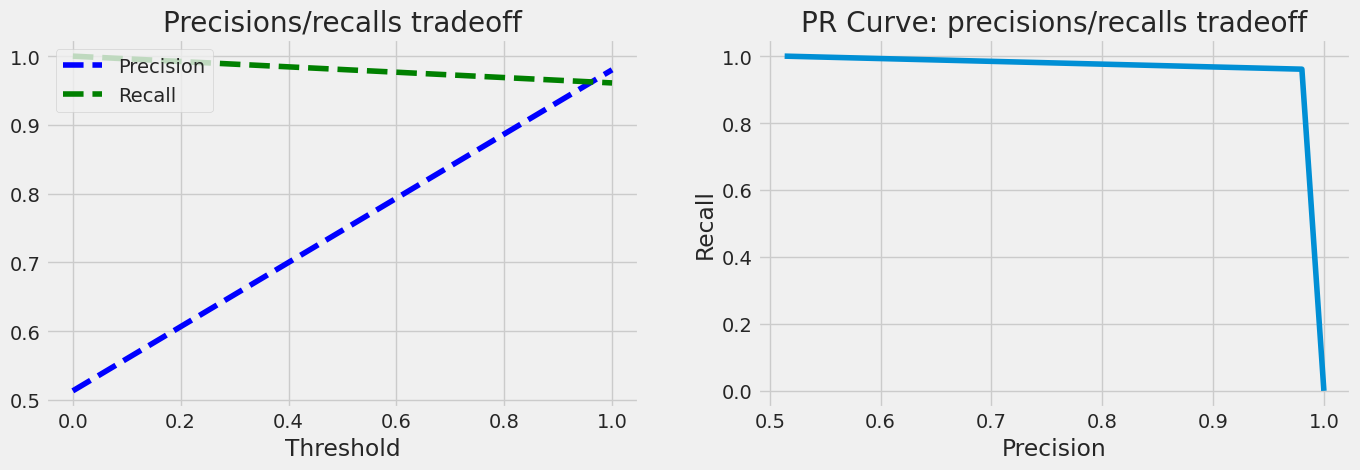

In [51]:
from sklearn.metrics import precision_recall_curve


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");